<a href="https://colab.research.google.com/github/hyunicecream/ML-DL/blob/main/Keras(BostonHousing%20Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.regularizers import l1, l2, l1_l2 #overfitting 방지 방법 2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

In [ ]:
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
df = pd.DataFrame(boston.data, columns=[boston.feature_names])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
# 데이터 표준화하기
scaleX = StandardScaler()
feature_data = scaleX.fit_transform(boston.data)
scaleY = StandardScaler()
target_data = scaleY.fit_transform(boston.target.reshape(-1, 1)) # shape 맞춰주기, 

In [ ]:
# 학습 데이터와 시험 데이터로 분리한다.
x_train,x_test,y_train,y_test = train_test_split(feature_data, target_data, test_size=0.2)
x_train.shape, y_train.shape

((404, 13), (404, 1))

In [ ]:
# 신경망 생성
# OverFitting 방지방법 1 : Dropout 사용
# OverFitting 방지방법 2 : l1, l2, l1_l2 사용
# OverFitting 방지방법 3 : BatchNormalization(), Activation('relu')

x_input = Input(batch_shape = (None, 13))
h_layer = Dense(256, activation='relu')(x_input)
h_layer = Dropout(rate=0.5)(h_layer) # overfitting 방지1
h_layer = Dense(256, activation='relu', kernel_regularizer=l2(0.00))(h_layer) # overfitting 방지2
h_layer = Dense(256)(h_layer)
h_layer = BatchNormalization()(h_layer)
h_layer = Activation('relu')(h_layer)
y_output = Dense(1)(h_layer)

model = Model(x_input, y_output)
# Regression문제는 mse로 정의한다. 
# model.compile(loss='mse', optimizer=Adam(learning_rate=0.5)) 위에 optimaizer로 불러와서 따로 learning_rate를 설정할 수 있다. 
# learing_rate가 작으면 과거의 경험 중시(장기 이동평균ex:0.01), 안정적, 더 나은 결과 노력부족/ 크면 과거의 경험 무시, 현재 중시 (단기이동 평균), 변화적응력은 좋지만 안전성이 떨어진다. 
model.compile(loss='mse', optimizer=Adam(learning_rate=0.5))
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_16 (Dense)            (None, 256)               3584      
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               65792     
                                                                 
 dense_18 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                           

In [ ]:
hist = model.fit(x_train, y_train, batch_size = 10, epochs=50, validation_data = (x_test, y_test))

Epoch 1/50
41/41 [==============================] - 1s 8ms/step - loss: 90.5986 - val_loss: 7739.8525
Epoch 2/50
41/41 [==============================] - 0s 4ms/step - loss: 2.8109 - val_loss: 537.9417
Epoch 3/50
41/41 [==============================] - 0s 4ms/step - loss: 1.1793 - val_loss: 32.0729
Epoch 4/50
41/41 [==============================] - 0s 5ms/step - loss: 0.9366 - val_loss: 0.8627
Epoch 5/50
41/41 [==============================] - 0s 5ms/step - loss: 0.8264 - val_loss: 0.8505
Epoch 6/50
41/41 [==============================] - 0s 5ms/step - loss: 0.7192 - val_loss: 0.5369
Epoch 7/50
41/41 [==============================] - 0s 6ms/step - loss: 0.5894 - val_loss: 0.4479
Epoch 8/50
41/41 [==============================] - 0s 6ms/step - loss: 0.6221 - val_loss: 0.3286
Epoch 9/50
41/41 [==============================] - 0s 5ms/step - loss: 0.6542 - val_loss: 0.7591
Epoch 10/50
41/41 [==============================] - 0s 6ms/step - loss: 0.5787 - val_loss: 0.9385
Epoch 11/50


In [ ]:
# mse 값은 작을 수록 좋다. Accuracy와 반대
y_pred = model.predict(x_test)
print('MSE =', mean_squared_error(y_test, y_pred))

MSE = 0.2590523278037575


In [ ]:
# 표준화된 y_pred를 원래값으로 역변환
y_pred = scaleY.inverse_transform(y_pred)
# print(y_pred)

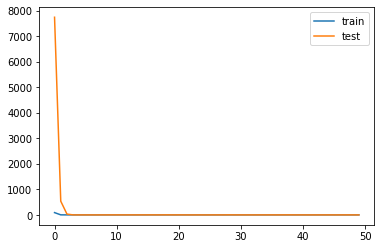

In [ ]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.show()